In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re

In [32]:
#Reading the Dataset
xls = pd.ExcelFile('HospitalDatabase .xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR = pd.read_excel(xls, 'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

3

Text(0.5, 1.0, 'Figure Chart')

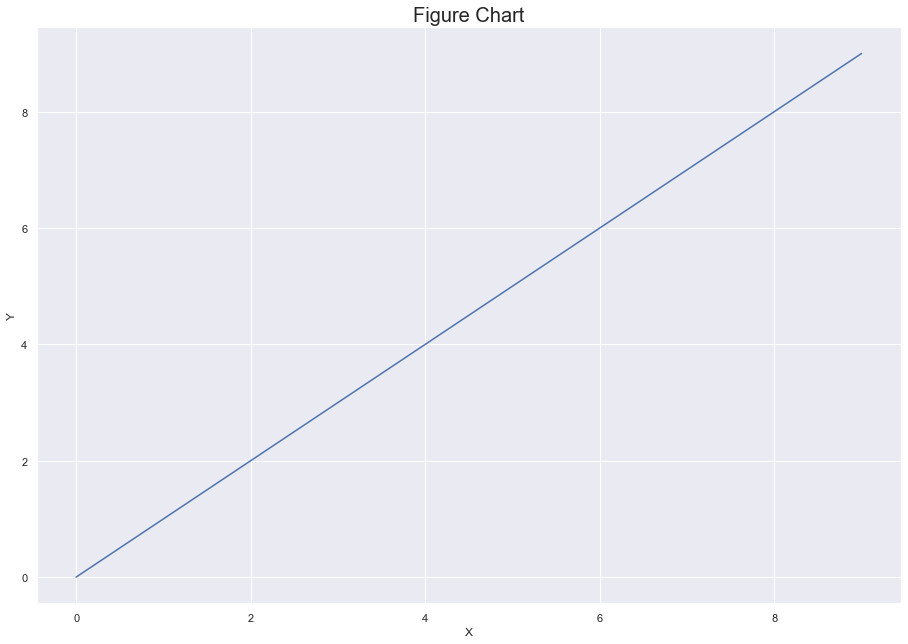

In [33]:
sns.set(style="darkgrid")
x=range(0,10)
y=range(0,10)
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title("Figure Chart",fontsize=20)

# 7

<Figure size 864x360 with 0 Axes>

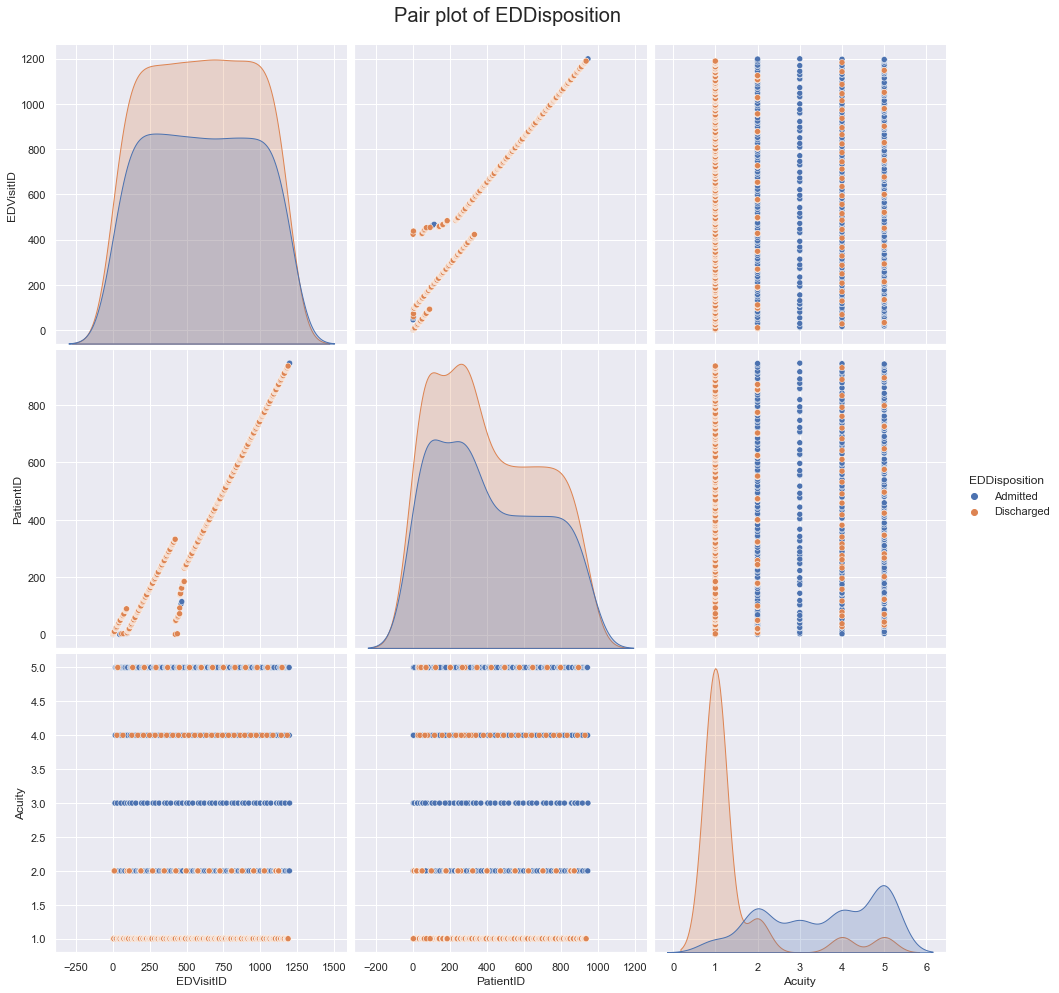

In [34]:
plt.figure(figsize=(12,5))

sns.pairplot(df_EDV, hue='EDDisposition',height=4.5)
plt.title("Pair plot of EDDisposition",y=3.1,x=-0.5,fontsize=20)
plt.show()

In [35]:
from pandasql import sqldf 
import pandasql as ps
df_Tnames  = ps.sqldf("select ProviderName from df_P where ProviderName like 'T%'")
df_Tnames

,ProviderName
0,Ted Texas
1,Ted Green
2,Ted Black
3,Tyler Conner
4,Tony Creed
5,Trent Tye


# 11

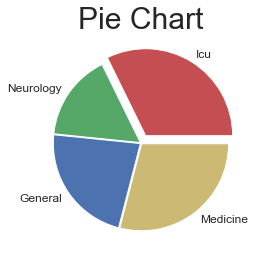

In [36]:
Service= ["Icu", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
outside=(0.5,0.6,0.2)
plt.pie(ExpectedLOS,labels=Service, colors=['r','g','b','y'],explode=(0.1,0.01,0.01,0.01),textprops={'fontsize': 12})
plt.title('Pie Chart',fontsize=30)
plt.show()

# 15 Replace all the null values in ReadmissionFlag with 0.

In [37]:
df_RR['ReadmissionFlag'].fillna(0,inplace=True)
df_RR

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


#### 
Q19. Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [38]:
df_datetime = pd.DataFrame(data={}, columns=['date', 'time'])
df_datetime['date'] = pd.to_datetime(df_RR['DischargeDate']).dt.date
df_datetime['time'] = pd.to_datetime(df_RR['DischargeDate']).dt.time
df_datetime

,date,time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


In [39]:
23

23

In [40]:
input_list1=[2,7,4,4,2,7,8,9,0]
input_list2=[2,7,4,4,2,7,8,9]
def findcenter(input_list):
    center_element= float(len(input_list))/2
    if center_element % 2 != 0:
        return input_list[int(center_element - .5)]
    else:
        return (input_list[int(center_element)], input_list[int(center_element-1)])
center1=findcenter(input_list1)
print(center1)
center2=findcenter(input_list2)
print(center2)

2
(2, 4)


###27

<AxesSubplot:title={'center':'Discharge Disposition'}, xlabel='DischargeDisposition', ylabel='Count of Patients'>

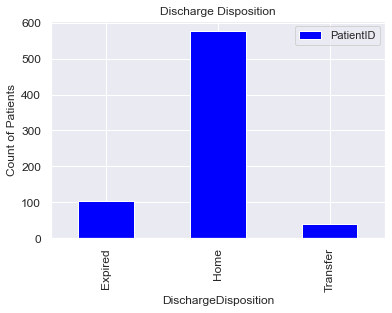

In [41]:
df=df_D.groupby(['DischargeDisposition'])[['PatientID']].count()
df.plot(kind='bar',title='Discharge Disposition',ylabel='Count of Patients',color=['blue'],fontsize=12,grid=True)

###31

In [42]:
Count=df_PA['PatientID'][(df_PA['Race']=='White') & (df_PA['Language']=='Spanish') & (df_PA['Gender']=='Male')].count()
Count

15

# 35

In [43]:
a=np.arange(1,31).reshape(6,5)

a[2:4,0:2]

array([[11, 12],
       [16, 17]])

### 39

In [48]:
df = pd.merge(df_PA,df_EDU, how="inner", on=["PatientID"])
ls = df['ReasonForVisit']=='Migraine'
df.loc[ls][['FirstName','LastName','DateOfBirth','ReasonForVisit']]

,FirstName,LastName,DateOfBirth,ReasonForVisit
1,Far,Myers,1985-11-15 02:08:42.090,Migraine
2,Devlin,Michael,1976-04-15 02:52:09.762,Migraine
11,Zonnya,Ab,1963-05-23 10:04:33.074,Migraine
13,Gan,Yu,1970-06-02 06:22:54.675,Migraine
21,Joesph,Long,1979-12-04 16:45:56.080,Migraine
...,...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483,Migraine
907,Knox,Group,1975-08-25 22:27:50.177,Migraine
909,Kuvalis,Coupland,1986-05-23 19:23:27.752,Migraine
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178,Migraine


In [58]:
df_patients=df_EDV.groupby(['ReasonForVisit','EDDisposition']).count().unstack()
df_patients['PatientID']

EDDisposition,Admitted,Discharged
ReasonForVisit,,
Accident,39.0,NaN
Bleeding,16.0,15.0
Car Accident,17.0,NaN
Chest Pain,94.0,15.0
Cough,NaN,1.0
Fever,46.0,188.0
Gun Shot,16.0,NaN
Intoxication,NaN,30.0
Laceration,NaN,30.0


In [62]:
df_patients=dfEDU.groupby(['ReasonForVisit','EDDisposition']).count()
df_patients.stack()

ReasonForVisit  EDDisposition                 
Accident        admitted       EDVisitID          37
                               PatientID          37
                               VisitDate          37
                               EDDischargeTime    37
                               Acuity             37
                                                  ..
Stomach Ache    discharged     EDVisitID          75
                               PatientID          75
                               VisitDate          75
                               EDDischargeTime    75
                               Acuity             75
Length: 140, dtype: int64

In [55]:
data = df_ED.groupby(['EDDisposition','ReasonForVisit'],as_index=False)['PatientID'].count()
print(data)
stack = pd.DataFrame(data)

Stack_pivot =stack.pivot(index='EDDisposition',columns = ['ReasonForVisit'],values='PatientID')
Stack_pivot

   EDDisposition       ReasonForVisit  PatientID
0       Admitted             Accident         39
1       Admitted             Bleeding         16
2       Admitted         Car Accident         17
3       Admitted           Chest Pain         94
4       Admitted                Fever         46
5       Admitted             Gun Shot         16
6       Admitted             Migraine         47
7       Admitted            Pneumonia        136
8       Admitted  Shortness of Breath         72
9       Admitted         Stomach Ache         32
10    Discharged             Bleeding         15
11    Discharged           Chest Pain         15
12    Discharged                Cough          1
13    Discharged                Fever        188
14    Discharged         Intoxication         30
15    Discharged           Laceration         30
16    Discharged             Migraine        109
17    Discharged            Pneumonia         65
18    Discharged  Shortness of Breath         77
19    Discharged    

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


In [60]:
stacked = Stack_pivot.stack()
stacked

EDDisposition  ReasonForVisit     
Admitted       Accident                39.0
               Bleeding                16.0
               Car Accident            17.0
               Chest Pain              94.0
               Fever                   46.0
               Gun Shot                16.0
               Migraine                47.0
               Pneumonia              136.0
               Shortness of Breath     72.0
               Stomach Ache            32.0
Discharged     Bleeding                15.0
               Chest Pain              15.0
               Cough                    1.0
               Fever                  188.0
               Intoxication            30.0
               Laceration              30.0
               Migraine               109.0
               Pneumonia               65.0
               Shortness of Breath     77.0
               Stomach Ache           154.0
dtype: float64

In [61]:
stacked.unstack()

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0
